# Part 1: Data Analysis and Preprocessing


In [30]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [31]:
# Create a random seed for reproducibility
np.random.seed(42)

# Generate sample data for the e-commerce dataset
n_samples = 1000

customer_ids = np.random.randint(1001, 1101, size=n_samples)
timestamps = pd.date_range(start='2023-01-01', periods=n_samples, freq='D')
product_ids = np.random.randint(1, 21, size=n_samples)
categories = np.random.choice(['Electronics', 'Clothing', 'Home', 'Books'], size=n_samples)
prices = np.random.uniform(10, 500, size=n_samples)
quantities = np.random.randint(1, 6, size=n_samples)
actions = np.random.choice(['Purchase', 'View', 'Add to Cart'], size=n_samples)

# Introduce missing values for Price and Category
missing_indices = np.random.choice(n_samples, size=int(n_samples * 0.1), replace=False)
prices[missing_indices] = np.nan
categories[missing_indices] = np.nan

# Introduce bias by making 'Electronics' products more likely to be purchased
bias_indices = np.where(categories == 'Electronics')[0]
actions[bias_indices] = 'Purchase'

# Create the DataFrame
ecommerce_data = pd.DataFrame({
    'CustomerID': customer_ids,
    'Timestamp': timestamps,
    'ProductID': product_ids,
    'Category': categories,
    'Price': prices,
    'Quantity': quantities,
    'Action': actions
})

# Check data
ecommerce_data.head()

,CustomerID,Timestamp,ProductID,Category,Price,Quantity,Action
0,1052,2023-01-01,2,Clothing,125.570224,2,Add to Cart
1,1093,2023-01-02,15,Clothing,191.996781,3,Add to Cart
2,1015,2023-01-03,8,Clothing,40.645691,1,Add to Cart
3,1072,2023-01-04,8,nan,NaN,2,View
4,1061,2023-01-05,17,nan,NaN,5,Purchase


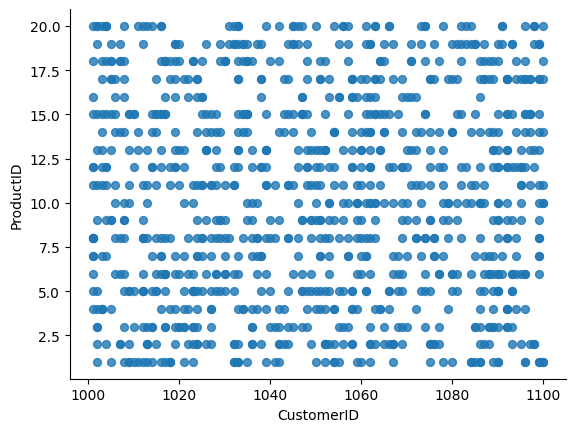

In [32]:
# @title CustomerID vs ProductID

from matplotlib import pyplot as plt
ecommerce_data.plot(kind='scatter', x='CustomerID', y='ProductID', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

In [33]:
# Save the DataFrame to a CSV file
ecommerce_data.to_csv('ecommerce_data.csv', index=False)

### Data Handling

### Load the dataset using pandas

In [34]:
ecommerce_data = pd.read_csv('ecommerce_data.csv')
ecommerce_data.head()

,CustomerID,Timestamp,ProductID,Category,Price,Quantity,Action
0,1052,2023-01-01,2,Clothing,125.570224,2,Add to Cart
1,1093,2023-01-02,15,Clothing,191.996781,3,Add to Cart
2,1015,2023-01-03,8,Clothing,40.645691,1,Add to Cart
3,1072,2023-01-04,8,NaN,NaN,2,View
4,1061,2023-01-05,17,NaN,NaN,5,Purchase


In [35]:
ecommerce_data.shape

(1000, 7)

In [36]:
ecommerce_data.columns

Index(['CustomerID', 'Timestamp', 'ProductID', 'Category', 'Price', 'Quantity',
       'Action'],
      dtype='object')

### Handling Missing Data

- Dropping Data
- Imputing (averaging them)

Missing Values:
CustomerID      0
Timestamp       0
ProductID       0
Category      100
Price         100
Quantity        0
Action          0
dtype: int64


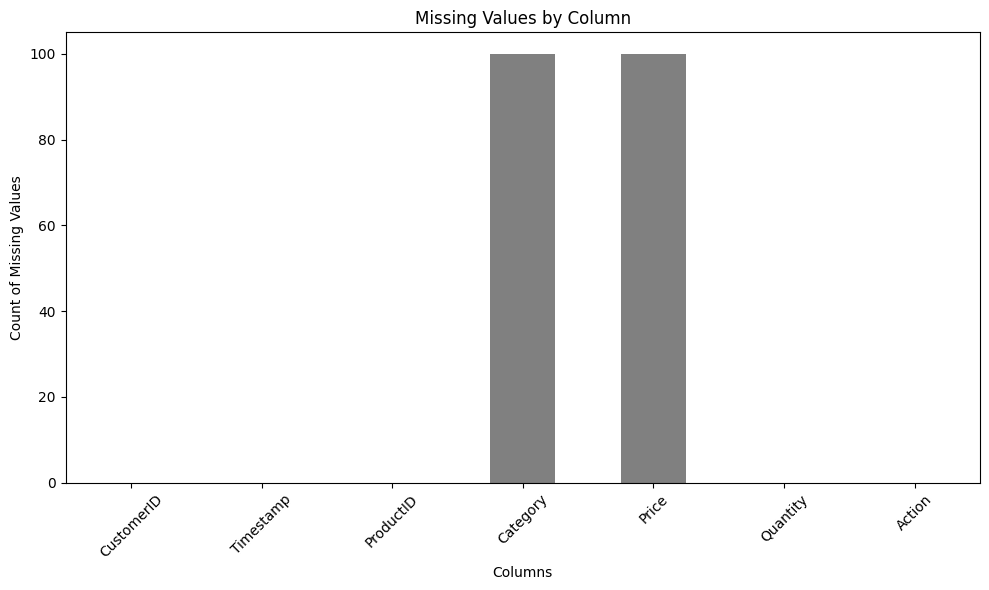

In [37]:
# Identify missing values
missing_values = ecommerce_data.isnull().sum()

# Display the missing values for each column
print("Missing Values:")
print(missing_values)

# Create a plot using Matplotlib to visualize the missing values
plt.figure(figsize=(10, 6))
missing_values.plot(kind='bar', stacked=True, color='gray')
plt.title('Missing Values by Column')
plt.xlabel('Columns')
plt.ylabel('Count of Missing Values')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [38]:
# Dropping rows with missing CustomerID
cleaned_data = ecommerce_data.dropna(subset=['CustomerID'])

# Fill missing Category values with the most common category
most_common_category = cleaned_data['Category'].mode()[0]
cleaned_data['Category'].fillna(most_common_category, inplace=True)

# Impute missing Price values with the mean
mean_imputed_data = cleaned_data.copy()
mean_imputed_data['Price'].fillna(cleaned_data['Price'].mean(), inplace=True)
cleaned_data = mean_imputed_data

Missing Values:
CustomerID    0
Timestamp     0
ProductID     0
Category      0
Price         0
Quantity      0
Action        0
dtype: int64


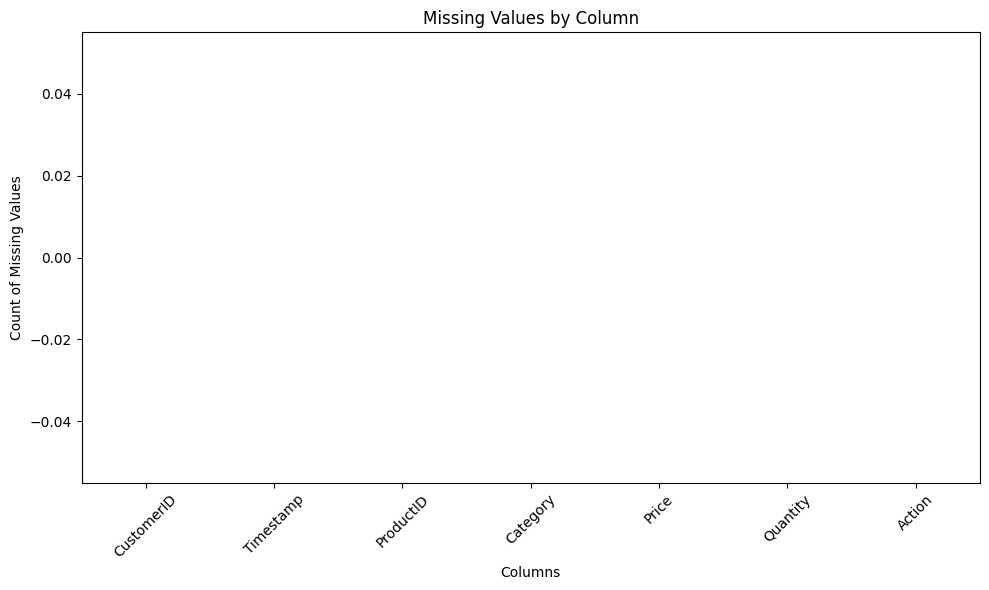

In [39]:
# Check if missing data has been handled
missing_values = cleaned_data.isnull().sum()
print("Missing Values:")
print(missing_values)

# Create a plot using Matplotlib to visualize the missing values
plt.figure(figsize=(10, 6))
missing_values.plot(kind='bar', stacked=True, color='gray')
plt.title('Missing Values by Column')
plt.xlabel('Columns')
plt.ylabel('Count of Missing Values')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



Action Distribution by Category:
Action       Add to Cart  Purchase  View
Category                                
Books                 75        76    74
Clothing             125        96   118
Electronics            0       234     0
Home                  71        60    71


<Figure size 1000x600 with 0 Axes>

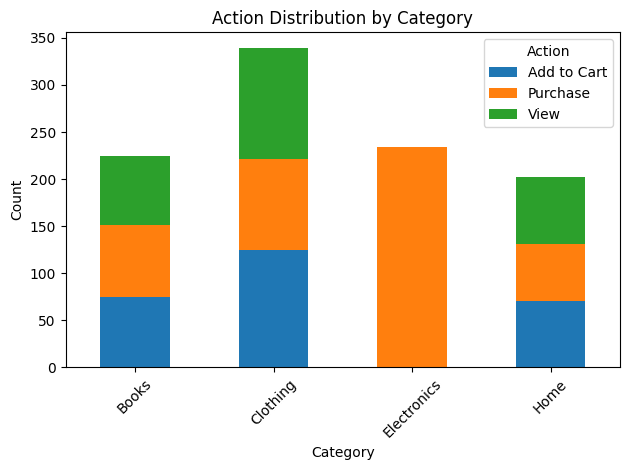

In [40]:
# Calculate the distribution of actions by category
action_distribution = pd.crosstab(index=cleaned_data['Category'], columns=cleaned_data['Action'])

# Display the distribution of actions by category
print("\nAction Distribution by Category:")
print(action_distribution)

# Visualize the distribution of actions by category (stacked bar plot)
plt.figure(figsize=(10, 6))
action_distribution.plot(kind='bar', stacked=True)
plt.title('Action Distribution by Category')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.legend(title='Action')
plt.show()

In [41]:
# Grouping by CustomerID and Action, then counting occurrences of each action
customer_interactions = ecommerce_data.groupby(['CustomerID', 'Action']).size().unstack(fill_value=0)

# Summing up all actions for each customer
customer_interactions['Total Actions'] = customer_interactions.sum(axis=1)

# Displaying the total number of actions for each customer
print('Total number of actions for each customer')
print(customer_interactions['Total Actions'])

# Print the values for each action
print('\n Values for each action')
print(customer_interactions.sum())



Total number of actions for each customer
CustomerID
1001    16
1002    13
1003    12
1004    11
1005    11
        ..
1096    13
1097     9
1098     7
1099    18
1100     9
Name: Total Actions, Length: 100, dtype: int64

 Values for each action
Action
Add to Cart       271
Purchase          466
View              263
Total Actions    1000
dtype: int64


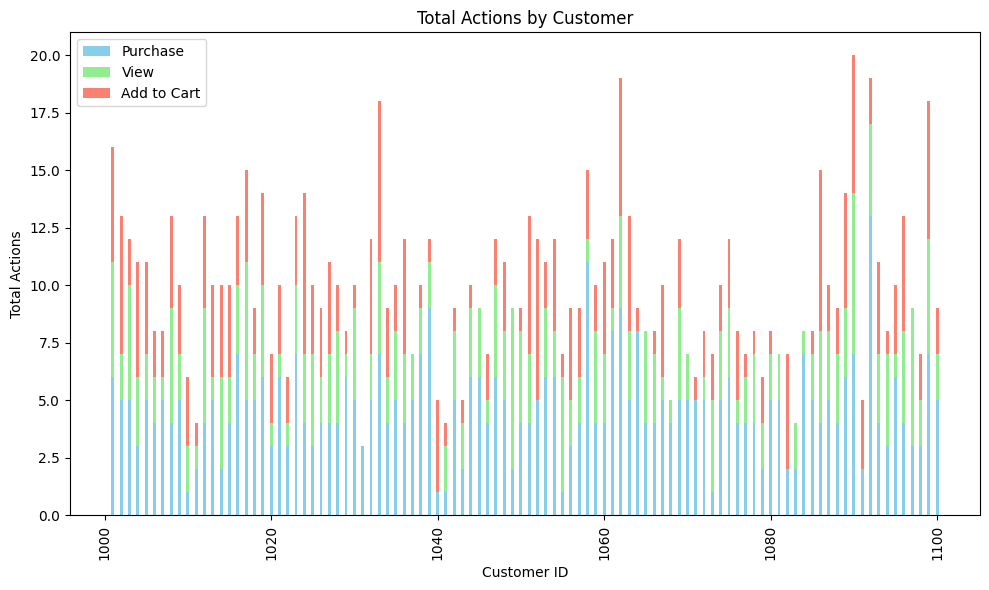

In [42]:
# Plotting total actions for each customer with distinction for each action
plt.figure(figsize=(10, 6))
bar_width = 0.35
index = customer_interactions.index
purchase = plt.bar(index, customer_interactions['Purchase'], bar_width, label='Purchase', color='skyblue')
view = plt.bar(index, customer_interactions['View'], bar_width, label='View', color='lightgreen', bottom=customer_interactions['Purchase'])
add_to_cart = plt.bar(index, customer_interactions['Add to Cart'], bar_width, label='Add to Cart', color='salmon', bottom=customer_interactions['Purchase'] + customer_interactions['View'])

plt.xlabel('Customer ID')
plt.ylabel('Total Actions')
plt.title('Total Actions by Customer')
plt.xticks(rotation=90)
plt.legend()
plt.tight_layout()
plt.show()


# Part 2: Feature Engineering and Analysis

CustomerID
1001     6080.861066
1002    10987.303028
1003     9254.428840
1004     7462.166017
1005     7451.954286
            ...     
1096    10278.332458
1097     4384.809469
1098     5073.614098
1099    11227.912763
1100     4808.418871
Name: TotalSpent, Length: 100, dtype: float64


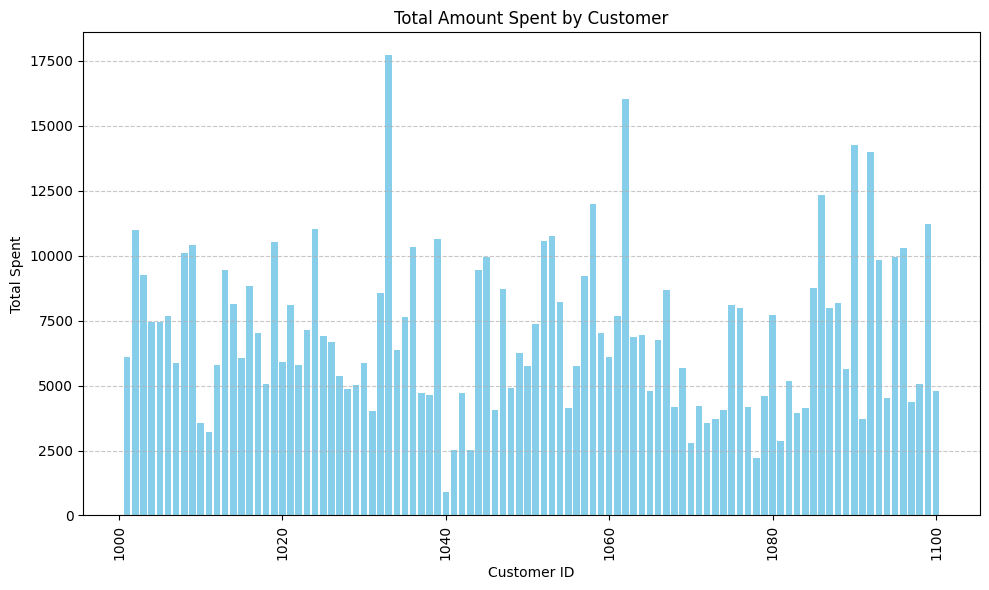

In [43]:
# Create a new feature TotalSpent
ecommerce_data['TotalSpent'] = ecommerce_data['Price'] * ecommerce_data['Quantity']

# Group the data by CustomerID and calculate total spent by each customer
total_spent_per_customer = ecommerce_data.groupby('CustomerID')['TotalSpent'].sum()

# Display the total amount spent by each customer
print(total_spent_per_customer)

# Plotting total amount spent by each customer
plt.figure(figsize=(10, 6))
plt.bar(total_spent_per_customer.index, total_spent_per_customer.values, color='skyblue')
plt.xlabel('Customer ID')
plt.ylabel('Total Spent')
plt.title('Total Amount Spent by Customer')
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

The most popular category is: Clothing


Clothing       239
Electronics    234
Books          225
Home           202
Name: Category, dtype: int64


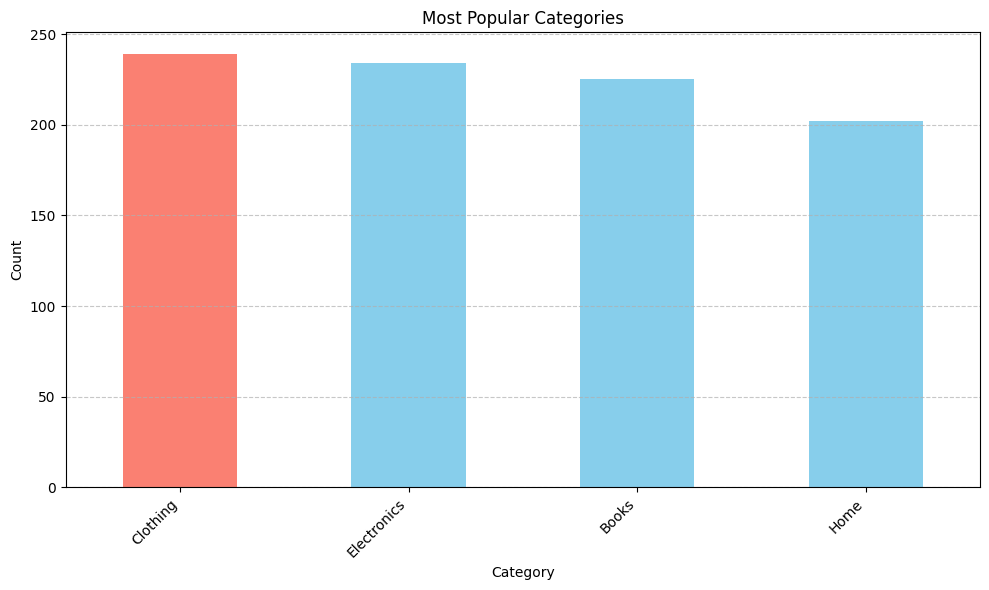

In [44]:
# Find the most popular category
most_popular_category = ecommerce_data['Category'].value_counts().idxmax()

# Group the data by Category and count occurrences
category_counts = ecommerce_data['Category'].value_counts()

# Display the most popular category
print("The most popular category is:", most_popular_category)

# Display the most popular categories in
print('\n')
print(category_counts)

# Plotting the count of occurrences for each category
plt.figure(figsize=(10, 6))
category_counts.plot(kind='bar', color=['skyblue' if category != most_popular_category else 'salmon' for category in category_counts.index])
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Most Popular Categories')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Category
Books          263.292355
Clothing       246.535105
Electronics    261.835832
Home           259.914688
Name: Price, dtype: float64


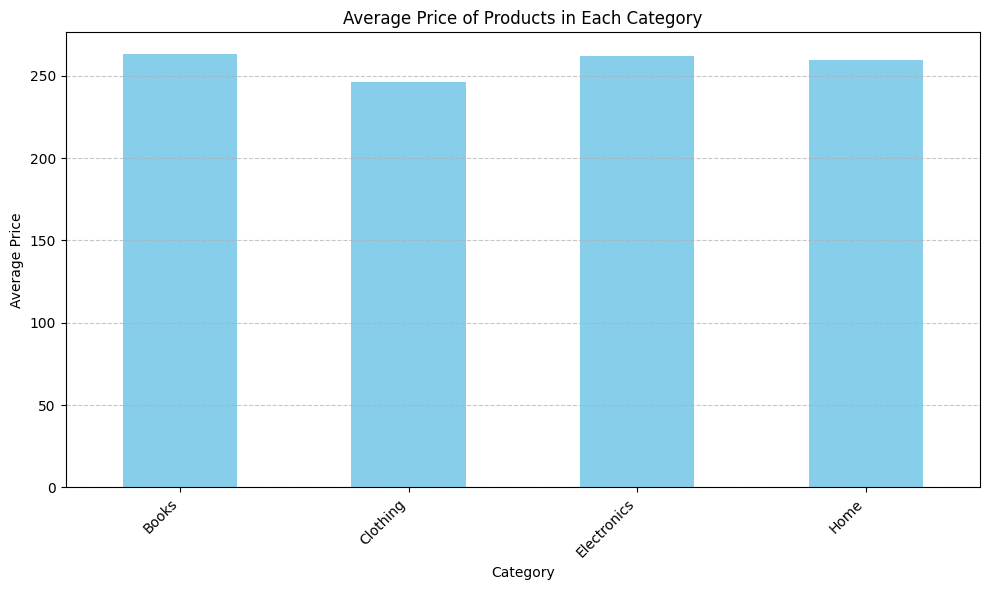

In [45]:
# Calculate the average price of products in each category
average_price_per_category = ecommerce_data.groupby('Category')['Price'].mean()

# Display the average price of products in each category
print(average_price_per_category)

# Plotting the average price of products in each category
plt.figure(figsize=(10, 6))
average_price_per_category.plot(kind='bar', color='skyblue')
plt.xlabel('Category')
plt.ylabel('Average Price')
plt.title('Average Price of Products in Each Category')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [46]:
# Calculate basic statistics for the cleaned data
statistics_cleaned = cleaned_data.describe()

# Display the statistics
print("\nBasic Statistics for Cleaned Data:")
print(statistics_cleaned)


Basic Statistics for Cleaned Data:
        CustomerID    ProductID        Price     Quantity
count  1000.000000  1000.000000  1000.000000  1000.000000
mean   1050.128000    10.338000   257.705579     2.975000
std      29.573505     5.771921   136.893133     1.414346
min    1001.000000     1.000000    10.092316     1.000000
25%    1024.000000     5.000000   143.066034     2.000000
50%    1051.000000    10.000000   257.705579     3.000000
75%    1075.000000    15.000000   371.234787     4.000000
max    1100.000000    20.000000   499.859764     5.000000



Total Revenue by Category:
Category
Books          59240.779861
Clothing       84692.447935
Electronics    61269.584634
Home           52502.766891
Name: Price, dtype: float64


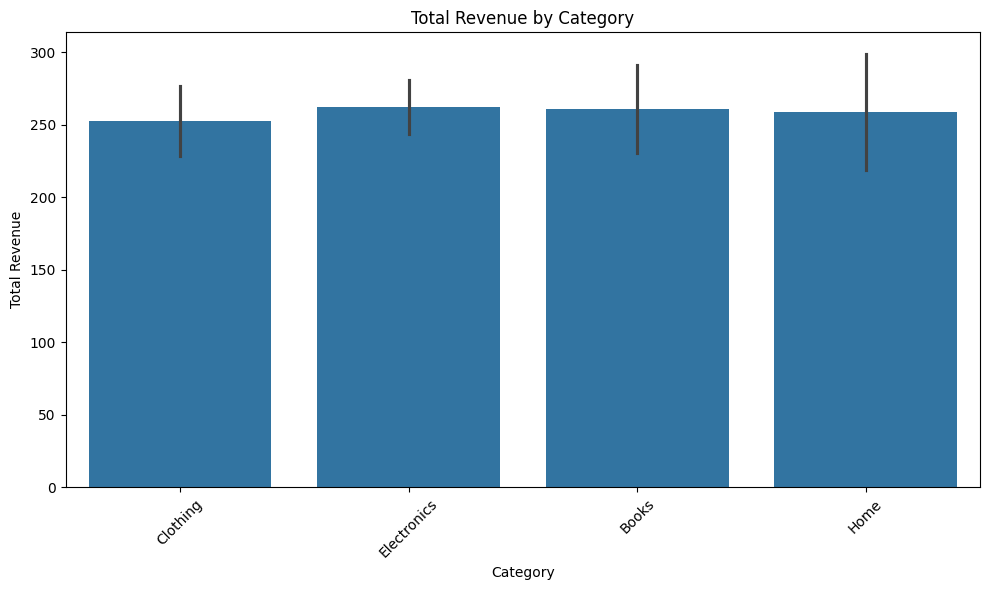

In [47]:
# Calculate total revenue for each category
category_revenue = cleaned_data.groupby('Category')['Price'].sum()

# Display total revenue per category
print("\nTotal Revenue by Category:")
print(category_revenue)

# Visualize the distribution of purchases by category
plt.figure(figsize=(10, 6))
sns.barplot(x='Category', y='Price', data=cleaned_data[cleaned_data['Action'] == 'Purchase'])
plt.title('Total Revenue by Category')
plt.xlabel('Category')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Part 3: Machine Learning Preprocessing

In [48]:
# Perform one-hot encoding for categorical variables
ecommerce_data_encoded = pd.get_dummies(ecommerce_data, columns=['Category', 'Action'], drop_first=True)

In [49]:
ecommerce_data_encoded.head()

,CustomerID,Timestamp,ProductID,Price,Quantity,TotalSpent,Category_Clothing,Category_Electronics,Category_Home,Action_Purchase,Action_View
0,1052,2023-01-01,2,125.570224,2,251.140447,1,0,0,0,0
1,1093,2023-01-02,15,191.996781,3,575.990343,1,0,0,0,0
2,1015,2023-01-03,8,40.645691,1,40.645691,1,0,0,0,0
3,1072,2023-01-04,8,NaN,2,NaN,0,0,0,0,1
4,1061,2023-01-05,17,NaN,5,NaN,0,0,0,1,0


In [50]:
ecommerce_data_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CustomerID            1000 non-null   int64  
 1   Timestamp             1000 non-null   object 
 2   ProductID             1000 non-null   int64  
 3   Price                 900 non-null    float64
 4   Quantity              1000 non-null   int64  
 5   TotalSpent            900 non-null    float64
 6   Category_Clothing     1000 non-null   uint8  
 7   Category_Electronics  1000 non-null   uint8  
 8   Category_Home         1000 non-null   uint8  
 9   Action_Purchase       1000 non-null   uint8  
 10  Action_View           1000 non-null   uint8  
dtypes: float64(2), int64(3), object(1), uint8(5)
memory usage: 51.9+ KB


In [51]:
#Standardize numerical features (Price, Quantity, TotalSpent) using Z-score normalization.
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

# Perform Z-score normalization for numerical features
numerical_features = ['Price', 'Quantity', 'TotalSpent']
ecommerce_data_encoded[numerical_features] = scaler.fit_transform(ecommerce_data_encoded[numerical_features])
print(ecommerce_data_encoded)

     CustomerID   Timestamp  ProductID     Price  Quantity  TotalSpent  \
0          1052  2023-01-01          2 -0.916170 -0.689709   -0.862767   
1          1093  2023-01-02         15 -0.455596  0.017685   -0.333943   
2          1015  2023-01-03          8 -1.505000 -1.397104   -1.205432   
3          1072  2023-01-04          8       NaN -0.689709         NaN   
4          1061  2023-01-05         17       NaN  1.432473         NaN   
..          ...         ...        ...       ...       ...         ...   
995        1010  2025-09-22         15  0.185399 -0.689709   -0.345502   
996        1067  2025-09-23          2  0.935013  1.432473    1.923636   
997        1018  2025-09-24          1  0.689574 -1.397104   -0.690178   
998        1100  2025-09-25         11 -1.132819  0.017685   -0.810950   
999        1086  2025-09-26         10  1.586263  0.725079    1.896206   

     Category_Clothing  Category_Electronics  Category_Home  Action_Purchase  \
0                    1         

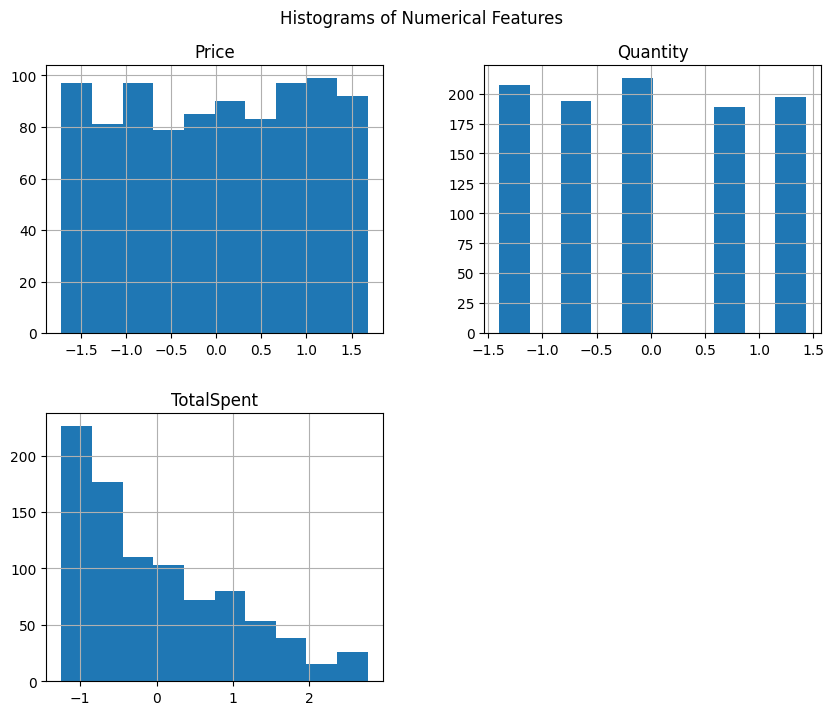

In [52]:
# Displaying histograms for numerical features
ecommerce_data_encoded[numerical_features].hist(figsize=(10, 8))
plt.suptitle('Histograms of Numerical Features', y=0.95)
plt.show()

### Splitting the dataset

In [53]:
from sklearn.model_selection import train_test_split

# Split dataset into features (X) and target variable (y)
X = ecommerce_data_encoded.drop(columns=['CustomerID', 'Timestamp'])
y = ecommerce_data_encoded['CustomerID']

# Split the dataset into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Calculate sizes of the resulting sets
train_size = len(X_train)
test_size = len(X_test)

print("\nDataset Splitting:")
print(f"Training set size: {train_size}")
print(f"Testing set size: {test_size}")


Dataset Splitting:
Training set size: 800
Testing set size: 200


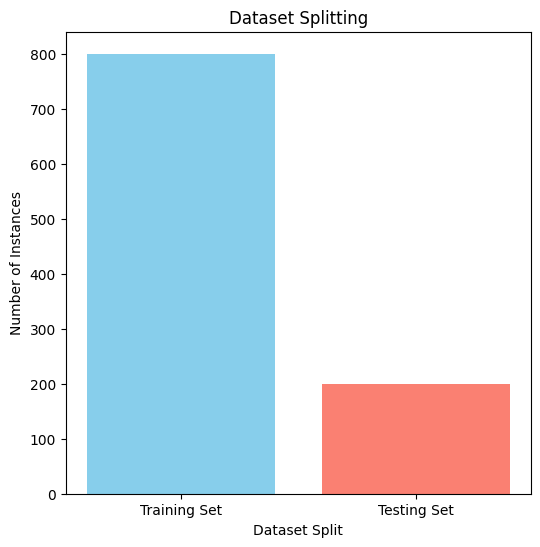

In [54]:
# Count of instances in each set
sizes = [train_size, test_size]
labels = ['Training Set', 'Testing Set']

# Plotting the dataset splitting
plt.figure(figsize=(6, 6))
plt.bar(labels, sizes, color=['skyblue', 'salmon'])
plt.xlabel('Dataset Split')
plt.ylabel('Number of Instances')
plt.title('Dataset Splitting')
plt.show()

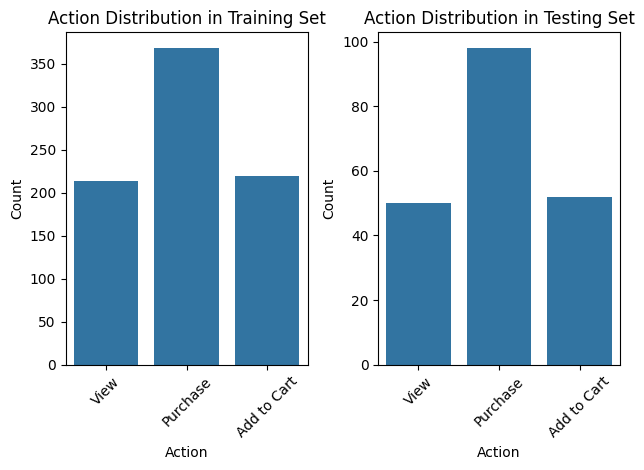

In [55]:
# Create subplots for the training and testing sets
# Split the preprocessed dataset into training and testing sets (80% training, 20% testing)
train_data, test_data = train_test_split(ecommerce_data, test_size=0.2, random_state=42)
# To ensure the sets are properly balanced
plt.subplot(1, 2, 1)
sns.countplot(data=train_data, x='Action')
plt.title('Action Distribution in Training Set')
plt.xlabel('Action')
plt.ylabel('Count')
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
sns.countplot(data=test_data, x='Action')
plt.title('Action Distribution in Testing Set')
plt.xlabel('Action')
plt.ylabel('Count')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

#Part 4: Insights and Data Preparation Summary

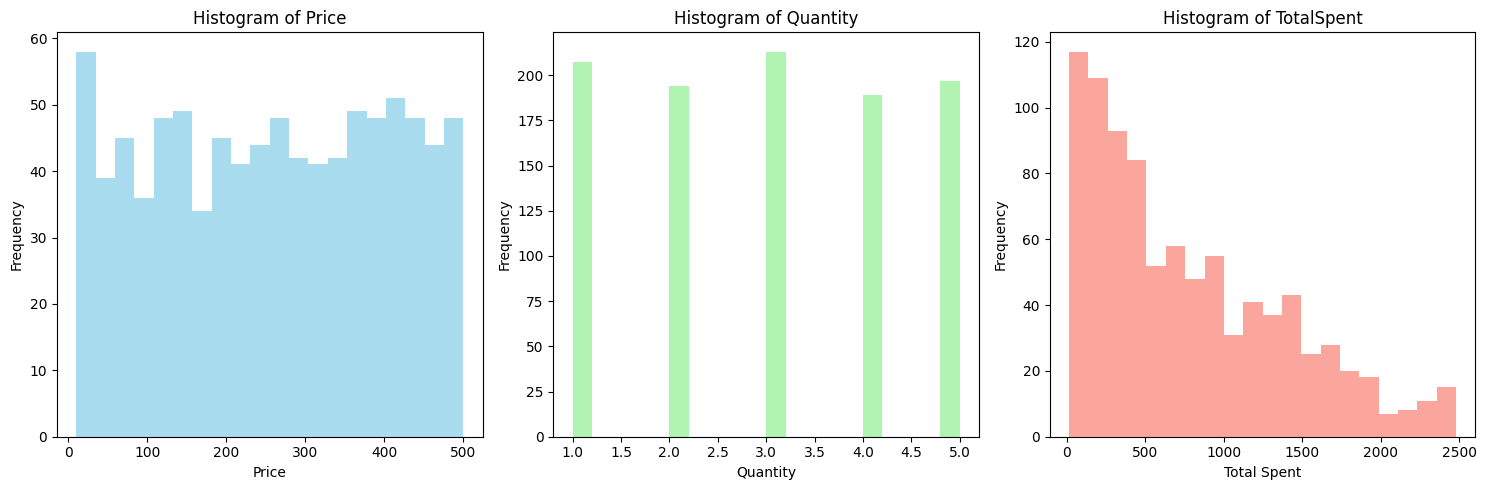

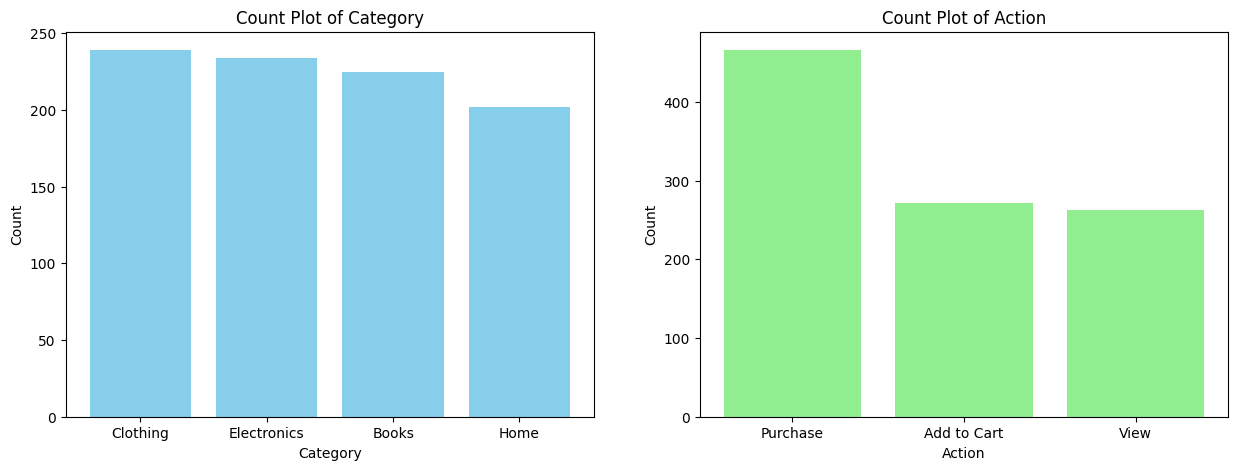

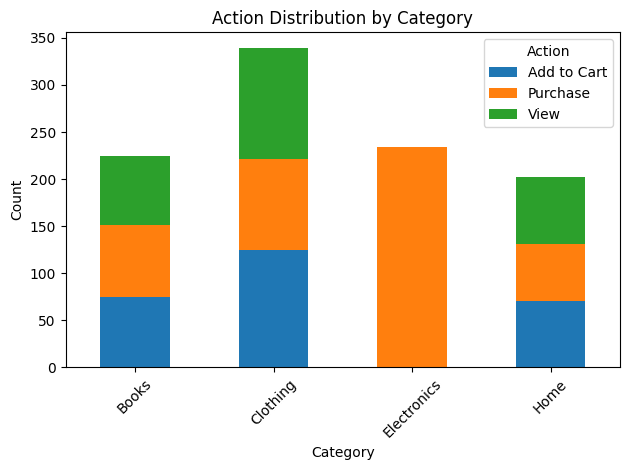

In [56]:
# Plot histograms for numerical features (Price, Quantity, TotalSpent)
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.hist(ecommerce_data['Price'], bins=20, color='skyblue', alpha=0.7)
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Histogram of Price')

plt.subplot(1, 3, 2)
plt.hist(ecommerce_data['Quantity'], bins=20, color='lightgreen', alpha=0.7)
plt.xlabel('Quantity')
plt.ylabel('Frequency')
plt.title('Histogram of Quantity')

plt.subplot(1, 3, 3)
plt.hist(ecommerce_data['TotalSpent'], bins=20, color='salmon', alpha=0.7)
plt.xlabel('Total Spent')
plt.ylabel('Frequency')
plt.title('Histogram of TotalSpent')

plt.tight_layout()
plt.show()

# Plot count plots for categorical features (Category, Action)
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.bar(ecommerce_data['Category'].value_counts().index, ecommerce_data['Category'].value_counts().values, color='skyblue')
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Count Plot of Category')

plt.subplot(1, 2, 2)
plt.bar(ecommerce_data['Action'].value_counts().index, ecommerce_data['Action'].value_counts().values, color='lightgreen')
plt.xlabel('Action')
plt.ylabel('Count')
plt.title('Count Plot of Action')

# Plot for Action Distribution by Category
plt.subplot(1, 2, 2)
action_distribution.plot(kind='bar', stacked=True)
plt.title('Action Distribution by Category')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.legend(title='Action')

plt.tight_layout()
plt.show()
